# P1 - Identificando personas desde una imagen de su cara

Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [20]:
#pip install keras
#pip install tensorflow
#pip install livelossplot
#pip install scikit-plot

In [3]:
# Librarías
from sklearn.datasets import fetch_lfw_people
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers
from keras import preprocessing
from keras import backend as K
from livelossplot import PlotLossesKeras

import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import scikitplot as skplt

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 40 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes

# con 10 mín  fotos se generan 158 categorías
# con 20 mín  fotos se generan 62 categorías (sugerido profesor)
# con 30 mín  fotos se generan 34 categorías
# con 40 mín  fotos se generan 19 categorías (sugerido paper Alejo)
# con 50 mín  fotos se generan 12 categorías
# con 60 mín  fotos se generan 8 categorías
# con 70 mín  fotos se generan 7 categorías (más común según paper Alejo)

In [5]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1867
Classes: 19
Dimentions: (62, 47)


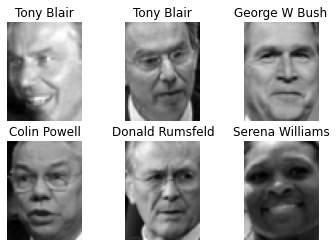

In [6]:
# Some examples
for i in range(6):
  img=X[i,:]
  img=img.reshape(W,H)
  plt.subplot(2,3,i+1)
  plt.title(target_names[y[i]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
plt.show()

### MODELO 3 - LOGISTIC REGRESION

# - ORIGINAL MODEL * TO BE HIDED

In [7]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Tuning parameters Logistic regresion:

* Paramter C as our regularization parameter. Parameter C = 1/λ.
Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.
Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.

* Penalty parameter refer to L1, L2 and Elastic-Net penalty. Ridge and Lasso regularizations are also known as ‘shrinkage’ methods, because they reduce or shrink the coefficients in the resulting regression. This reduces the variance in the model: as input variables are changed, the model’s prediction changes less than it would have without the regularization. Why would you want to reduce the variance of a model? To avoid overfit.


In [8]:
# Fit model
#Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV
#param = {'C': [1e1,1e2,1e3,1e4,1e5], 'max_iter':[50,100,500,1000]}
param = {'C': [1e3], 'max_iter':[1000]}
clf = GridSearchCV(LogisticRegression(fit_intercept=False,multi_class='ovr'),param, cv=5)
model_logg = clf.fit(X_train,y_train)
print(model_logg.best_estimator_)

LogisticRegression(C=1000.0, fit_intercept=False, max_iter=1000,
                   multi_class='ovr')


In [9]:
print("tuned hpyerparameters :(best parameters) ",model_logg.best_params_)
print("accuracy :",model_logg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'max_iter': 1000}
accuracy : 0.7173486565958116


In [10]:
# print("logistic regression")
ypred = model_logg.predict(X_test)
print(classification_report(y_test,ypred,target_names=target_names))

                           precision    recall  f1-score   support

             Ariel Sharon       0.56      0.64      0.60        14
    Arnold Schwarzenegger       0.67      0.33      0.44        12
             Colin Powell       0.84      0.88      0.86        52
          Donald Rumsfeld       0.79      0.77      0.78        30
            George W Bush       0.83      0.90      0.86       106
        Gerhard Schroeder       0.48      0.50      0.49        20
  Gloria Macapagal Arroyo       0.86      0.75      0.80         8
              Hugo Chavez       0.89      0.57      0.70        14
           Jacques Chirac       0.71      0.62      0.67         8
            Jean Chretien       0.64      0.64      0.64        11
        Jennifer Capriati       0.33      0.17      0.22         6
            John Ashcroft       0.62      0.50      0.56        10
        Junichiro Koizumi       0.83      0.83      0.83        12
               Laura Bush       0.88      0.78      0.82     

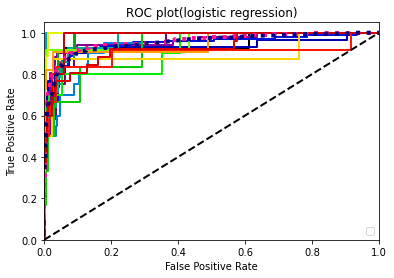

In [19]:
# ROC curve

y_probas = model_logg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,title="ROC plot(logistic regression)")
plt.legend('')
plt.show()

# - LR Model without tunning

# A. min_faces_per_person = 20 / resize=0.5

In [25]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 20 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes

In [26]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 3023
Classes: 62
Dimentions: (62, 47)


In [27]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [28]:
# Fit model
#Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV
#param = {'C': [1e1,1e2,1e3,1e4,1e5], 'max_iter':[50,100,500,1000]}
param = {'C': [1e3], 'max_iter':[1000]}
clf = GridSearchCV(LogisticRegression(fit_intercept=False,multi_class='ovr'),param, cv=5)
model_logg = clf.fit(X_train,y_train)
print(model_logg.best_estimator_)

LogisticRegression(C=1000.0, fit_intercept=False, max_iter=1000,
                   multi_class='ovr')


In [29]:
print("tuned hpyerparameters :(best parameters) ",model_logg.best_params_)
print("accuracy :",model_logg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'max_iter': 1000}
accuracy : 0.5707390106599592


In [30]:
# print("logistic regression")
ypred = model_logg.predict(X_test)
print(classification_report(y_test,ypred,target_names=target_names))

                           precision    recall  f1-score   support

         Alejandro Toledo       0.56      0.42      0.48        12
             Alvaro Uribe       0.57      0.67      0.62         6
          Amelie Mauresmo       0.75      0.50      0.60         6
             Andre Agassi       0.00      0.00      0.00         6
           Angelina Jolie       0.50      0.17      0.25         6
             Ariel Sharon       0.50      0.64      0.56        14
    Arnold Schwarzenegger       0.50      0.36      0.42        14
     Atal Bihari Vajpayee       0.67      0.33      0.44         6
             Bill Clinton       0.33      0.40      0.36         5
             Carlos Menem       0.75      0.75      0.75         4
             Colin Powell       0.83      0.73      0.77        59
            David Beckham       0.14      0.50      0.22         2
          Donald Rumsfeld       0.67      0.47      0.55        30
         George Robertson       1.00      0.50      0.67     

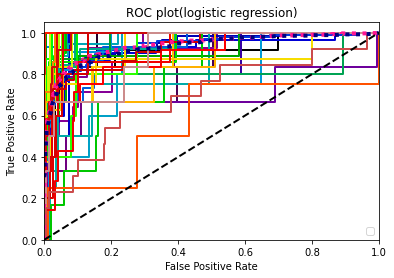

In [31]:
# ROC curve

y_probas = model_logg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,title="ROC plot(logistic regression)")
plt.legend('')
plt.show()

# B. min_faces_per_person = 20 / resize=0.7

In [61]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 20 # número mínimo de fotos por personaje para filtrar la base
resize=0.7 # Número de define la calidad de las imágenes

In [62]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 3023
Classes: 62
Dimentions: (87, 65)


In [63]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [64]:
# Fit model
#Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV
#param = {'C': [1e1,1e2,1e3,1e4,1e5], 'max_iter':[50,100,500,1000]}
param = {'C': [1e3], 'max_iter':[1000]}
clf = GridSearchCV(LogisticRegression(fit_intercept=False,multi_class='ovr'),param, cv=5)
model_logg = clf.fit(X_train,y_train)
print(model_logg.best_estimator_)

LogisticRegression(C=1000.0, fit_intercept=False, max_iter=1000,
                   multi_class='ovr')


In [65]:
print("tuned hpyerparameters :(best parameters) ",model_logg.best_params_)
print("accuracy :",model_logg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'max_iter': 1000}
accuracy : 0.5674195369847544


In [66]:
# print("logistic regression")
ypred = model_logg.predict(X_test)
print(classification_report(y_test,ypred,target_names=target_names))

                           precision    recall  f1-score   support

         Alejandro Toledo       0.55      0.50      0.52        12
             Alvaro Uribe       0.57      0.67      0.62         6
          Amelie Mauresmo       0.60      0.50      0.55         6
             Andre Agassi       0.00      0.00      0.00         6
           Angelina Jolie       0.33      0.17      0.22         6
             Ariel Sharon       0.50      0.64      0.56        14
    Arnold Schwarzenegger       0.50      0.29      0.36        14
     Atal Bihari Vajpayee       0.67      0.33      0.44         6
             Bill Clinton       0.38      0.60      0.46         5
             Carlos Menem       0.50      0.75      0.60         4
             Colin Powell       0.85      0.75      0.79        59
            David Beckham       0.14      0.50      0.22         2
          Donald Rumsfeld       0.61      0.47      0.53        30
         George Robertson       1.00      0.50      0.67     

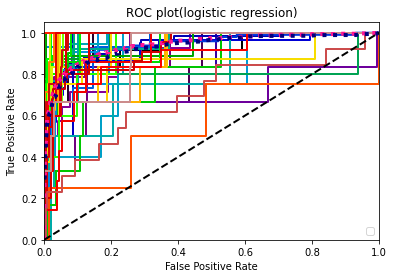

In [67]:
# ROC curve

y_probas = model_logg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,title="ROC plot(logistic regression)")
plt.legend('')
plt.show()

# C. min_faces_per_person = 40 / resize=0.5

In [11]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 40 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes

In [12]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1867
Classes: 19
Dimentions: (62, 47)


In [13]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
# Fit model
#Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV
#param = {'C': [1e1,1e2,1e3,1e4,1e5], 'max_iter':[50,100,500,1000]}
param = {'C': [1e3], 'max_iter':[1000]}
clf = GridSearchCV(LogisticRegression(fit_intercept=False,multi_class='ovr'),param, cv=5)
model_logg = clf.fit(X_train,y_train)
print(model_logg.best_estimator_)

LogisticRegression(C=1000.0, fit_intercept=False, max_iter=1000,
                   multi_class='ovr')


In [15]:
print("tuned hpyerparameters :(best parameters) ",model_logg.best_params_)
print("accuracy :",model_logg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'max_iter': 1000}
accuracy : 0.7173486565958116


In [16]:
# print("logistic regression")
ypred = model_logg.predict(X_test)
print(classification_report(y_test,ypred,target_names=target_names))

                           precision    recall  f1-score   support

             Ariel Sharon       0.56      0.64      0.60        14
    Arnold Schwarzenegger       0.67      0.33      0.44        12
             Colin Powell       0.84      0.88      0.86        52
          Donald Rumsfeld       0.79      0.77      0.78        30
            George W Bush       0.83      0.90      0.86       106
        Gerhard Schroeder       0.48      0.50      0.49        20
  Gloria Macapagal Arroyo       0.86      0.75      0.80         8
              Hugo Chavez       0.89      0.57      0.70        14
           Jacques Chirac       0.71      0.62      0.67         8
            Jean Chretien       0.64      0.64      0.64        11
        Jennifer Capriati       0.33      0.17      0.22         6
            John Ashcroft       0.62      0.50      0.56        10
        Junichiro Koizumi       0.83      0.83      0.83        12
               Laura Bush       0.88      0.78      0.82     

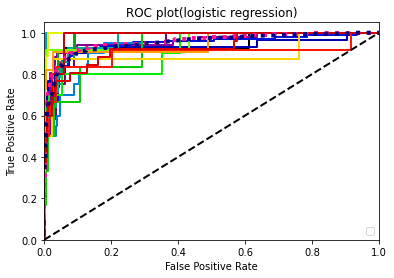

In [17]:
# ROC curve

y_probas = model_logg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,title="ROC plot(logistic regression)")
plt.legend('')
plt.show()

# D. min_faces_per_person = 40 / resize=0.7

In [4]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 40 # número mínimo de fotos por personaje para filtrar la base
resize=0.7 # Número de define la calidad de las imágenes

In [5]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1867
Classes: 19
Dimentions: (87, 65)


In [6]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
# Fit model
#Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV
#param = {'C': [1e1,1e2,1e3,1e4,1e5], 'max_iter':[50,100,500,1000]}
param = {'C': [1e3], 'max_iter':[1000]}
clf = GridSearchCV(LogisticRegression(fit_intercept=False,multi_class='ovr'),param, cv=5)
model_logg = clf.fit(X_train,y_train)
print(model_logg.best_estimator_)

LogisticRegression(C=1000.0, fit_intercept=False, max_iter=1000,
                   multi_class='ovr')


In [8]:
print("tuned hpyerparameters :(best parameters) ",model_logg.best_params_)
print("accuracy :",model_logg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'max_iter': 1000}
accuracy : 0.7173509012143386


In [9]:
# print("logistic regression")
ypred = model_logg.predict(X_test)
print(classification_report(y_test,ypred,target_names=target_names))

                           precision    recall  f1-score   support

             Ariel Sharon       0.62      0.71      0.67        14
    Arnold Schwarzenegger       0.67      0.33      0.44        12
             Colin Powell       0.84      0.88      0.86        52
          Donald Rumsfeld       0.75      0.70      0.72        30
            George W Bush       0.82      0.92      0.87       106
        Gerhard Schroeder       0.68      0.65      0.67        20
  Gloria Macapagal Arroyo       0.86      0.75      0.80         8
              Hugo Chavez       0.80      0.57      0.67        14
           Jacques Chirac       0.71      0.62      0.67         8
            Jean Chretien       0.70      0.64      0.67        11
        Jennifer Capriati       0.33      0.17      0.22         6
            John Ashcroft       0.62      0.50      0.56        10
        Junichiro Koizumi       0.91      0.83      0.87        12
               Laura Bush       0.89      0.89      0.89     

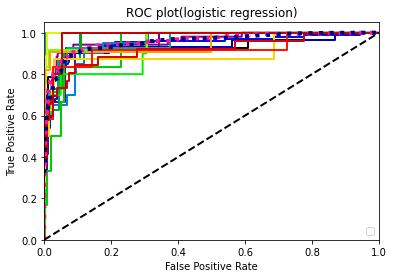

In [10]:
# ROC curve

y_probas = model_logg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,title="ROC plot(logistic regression)")
plt.legend('')
plt.show()

# E. min_faces_per_person = 60 / resize=0.5

In [68]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 60 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes

In [69]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1348
Classes: 8
Dimentions: (62, 47)


In [70]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [71]:
# Fit model
#Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV
#param = {'C': [1e1,1e2,1e3,1e4,1e5], 'max_iter':[50,100,500,1000]}
param = {'C': [1e3], 'max_iter':[1000]}
clf = GridSearchCV(LogisticRegression(fit_intercept=False,multi_class='ovr'),param, cv=5)
model_logg = clf.fit(X_train,y_train)
print(model_logg.best_estimator_)

LogisticRegression(C=1000.0, fit_intercept=False, max_iter=1000,
                   multi_class='ovr')


In [72]:
print("tuned hpyerparameters :(best parameters) ",model_logg.best_params_)
print("accuracy :",model_logg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'max_iter': 1000}
accuracy : 0.8172394487510767


In [73]:
# print("logistic regression")
ypred = model_logg.predict(X_test)
print(classification_report(y_test,ypred,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.58      0.67        12
     Colin Powell       0.88      0.84      0.86        51
  Donald Rumsfeld       0.75      0.72      0.73        25
    George W Bush       0.85      0.89      0.87        98
Gerhard Schroeder       0.76      0.76      0.76        21
      Hugo Chavez       0.91      0.67      0.77        15
Junichiro Koizumi       0.91      1.00      0.95        10
       Tony Blair       0.77      0.87      0.81        38

         accuracy                           0.83       270
        macro avg       0.83      0.79      0.80       270
     weighted avg       0.83      0.83      0.83       270



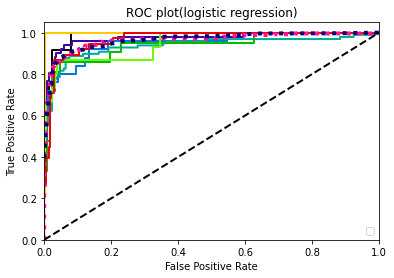

In [74]:
# ROC curve

y_probas = model_logg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,title="ROC plot(logistic regression)")
plt.legend('')
plt.show()

# F. min_faces_per_person = 60 / resize=0.7

In [75]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 60 # número mínimo de fotos por personaje para filtrar la base
resize=0.7 # Número de define la calidad de las imágenes

In [76]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1348
Classes: 8
Dimentions: (87, 65)


In [77]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [82]:
# Fit model
#Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV
#param = {'C': [1e1,1e2,1e3,1e4,1e5], 'max_iter':[50,100,500,1000]}
param = {'C': [1e3], 'max_iter':[1000]}
clf = GridSearchCV(LogisticRegression(fit_intercept=False,multi_class='ovr'),param, cv=5)
model_logg = clf.fit(X_train,y_train)
print(model_logg.best_estimator_)

LogisticRegression(C=1000.0, fit_intercept=False, max_iter=1000,
                   multi_class='ovr')


In [83]:
print("tuned hpyerparameters :(best parameters) ",model_logg.best_params_)
print("accuracy :",model_logg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'max_iter': 1000}
accuracy : 0.8088888888888889


In [84]:
# print("logistic regression")
ypred = model_logg.predict(X_test)
print(classification_report(y_test,ypred,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.80      0.67      0.73        12
     Colin Powell       0.88      0.86      0.87        51
  Donald Rumsfeld       0.77      0.68      0.72        25
    George W Bush       0.86      0.89      0.87        98
Gerhard Schroeder       0.76      0.76      0.76        21
      Hugo Chavez       0.91      0.67      0.77        15
Junichiro Koizumi       0.91      1.00      0.95        10
       Tony Blair       0.75      0.87      0.80        38

         accuracy                           0.83       270
        macro avg       0.83      0.80      0.81       270
     weighted avg       0.83      0.83      0.83       270



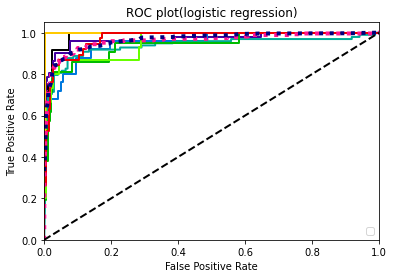

In [85]:
# ROC curve

y_probas = model_logg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,title="ROC plot(logistic regression)")
plt.legend('')
plt.show()

# G. min_faces_per_person = 70 / resize=0.5

In [86]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 70 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes

In [87]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1288
Classes: 7
Dimentions: (62, 47)


In [88]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [89]:
# Fit model
#Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV
#param = {'C': [1e1,1e2,1e3,1e4,1e5], 'max_iter':[50,100,500,1000]}
param = {'C': [1e3], 'max_iter':[1000]}
clf = GridSearchCV(LogisticRegression(fit_intercept=False,multi_class='ovr'),param, cv=5)
model_logg = clf.fit(X_train,y_train)
print(model_logg.best_estimator_)

LogisticRegression(C=1000.0, fit_intercept=False, max_iter=1000,
                   multi_class='ovr')


In [90]:
print("tuned hpyerparameters :(best parameters) ",model_logg.best_params_)
print("accuracy :",model_logg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'max_iter': 1000}
accuracy : 0.8135922330097086


In [91]:
# print("logistic regression")
ypred = model_logg.predict(X_test)
print(classification_report(y_test,ypred,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.73      0.73        11
     Colin Powell       0.80      0.91      0.85        47
  Donald Rumsfeld       0.73      0.73      0.73        22
    George W Bush       0.96      0.89      0.93       119
Gerhard Schroeder       0.76      0.84      0.80        19
      Hugo Chavez       0.88      0.54      0.67        13
       Tony Blair       0.69      0.81      0.75        27

         accuracy                           0.84       258
        macro avg       0.79      0.78      0.78       258
     weighted avg       0.85      0.84      0.85       258



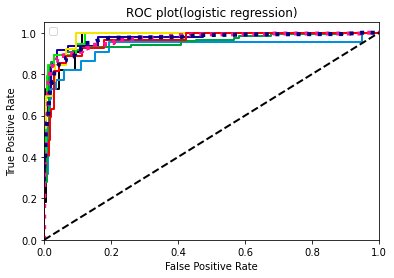

In [92]:
# ROC curve

y_probas = model_logg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,title="ROC plot(logistic regression)")
plt.legend('')
plt.show()

# H. min_faces_per_person = 70 / resize=0.7

In [93]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 70 # número mínimo de fotos por personaje para filtrar la base
resize=0.7 # Número de define la calidad de las imágenes

In [94]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1288
Classes: 7
Dimentions: (87, 65)


In [95]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [96]:
# Fit model
#Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV
#param = {'C': [1e1,1e2,1e3,1e4,1e5], 'max_iter':[50,100,500,1000]}
param = {'C': [1e3], 'max_iter':[1000]}
clf = GridSearchCV(LogisticRegression(fit_intercept=False,multi_class='ovr'),param, cv=5)
model_logg = clf.fit(X_train,y_train)
print(model_logg.best_estimator_)

LogisticRegression(C=1000.0, fit_intercept=False, max_iter=1000,
                   multi_class='ovr')


In [97]:
print("tuned hpyerparameters :(best parameters) ",model_logg.best_params_)
print("accuracy :",model_logg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'max_iter': 1000}
accuracy : 0.8116504854368932


In [98]:
# print("logistic regression")
ypred = model_logg.predict(X_test)
print(classification_report(y_test,ypred,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.73      0.70        11
     Colin Powell       0.81      0.91      0.86        47
  Donald Rumsfeld       0.70      0.73      0.71        22
    George W Bush       0.96      0.90      0.93       119
Gerhard Schroeder       0.79      0.79      0.79        19
      Hugo Chavez       0.88      0.54      0.67        13
       Tony Blair       0.71      0.81      0.76        27

         accuracy                           0.84       258
        macro avg       0.79      0.77      0.77       258
     weighted avg       0.85      0.84      0.85       258



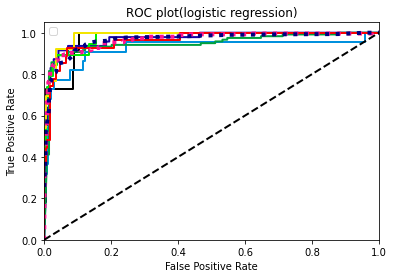

In [99]:
# ROC curve

y_probas = model_logg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,title="ROC plot(logistic regression)")
plt.legend('')
plt.show()

## Selected: E. min_faces_per_person = 60 / resize=0.5 con Accuracy: 81,712%

## - LR Model with tunning

In [141]:
# DataSet : “Labeled Faces in the Wild”
min_faces_per_person = 60 # número mínimo de fotos por personaje para filtrar la base
resize=0.5 # Número de define la calidad de las imágenes

In [142]:
# Some definitions

data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)

l=list(data.keys())
X=data[l[0]]
y=data[l[2]]
target_names=data[l[3]]

_,W,H=data[l[1]].shape
features=X.shape[1]
m=X.shape[0]
classes=data[l[3]].shape[0]

print("Resumen Imágenes a procesar")
print("Samples:",m)
print("Classes:",classes)
print("Dimentions:",(W,H))

Resumen Imágenes a procesar
Samples: 1348
Classes: 8
Dimentions: (62, 47)


In [143]:
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Tuning parameters Logistic regresion:

* Paramter C as our regularization parameter. Parameter C = 1/λ.
Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple.
Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.

* Penalty parameter refer to L1, L2 and Elastic-Net penalty. Ridge and Lasso regularizations are also known as ‘shrinkage’ methods, because they reduce or shrink the coefficients in the resulting regression. This reduces the variance in the model: as input variables are changed, the model’s prediction changes less than it would have without the regularization. Why would you want to reduce the variance of a model? To avoid overfit.


In [126]:
# Fit model
#Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV
param = {'C': [1e1,1e2,1e3,1e4,1e5], 'max_iter':[50,100,500,1000]}
#param = {'C': [1e1], 'max_iter':[100]}
clf = GridSearchCV(LogisticRegression(fit_intercept=False,multi_class='ovr'),param, cv=5)
model_logg = clf.fit(X_train,y_train)
print(model_logg.best_estimator_)

LogisticRegression(C=10.0, fit_intercept=False, max_iter=1000,
                   multi_class='ovr')


In [127]:
print("tuned hpyerparameters :(best parameters) ",model_logg.best_params_)
print("accuracy :",model_logg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'max_iter': 1000}
accuracy : 0.8218949181739879


In [128]:
# print("logistic regression")
ypred = model_logg.predict(X_test)
print(classification_report(y_test,ypred,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.58      0.67        12
     Colin Powell       0.86      0.84      0.85        51
  Donald Rumsfeld       0.77      0.68      0.72        25
    George W Bush       0.84      0.89      0.87        98
Gerhard Schroeder       0.70      0.76      0.73        21
      Hugo Chavez       1.00      0.53      0.70        15
Junichiro Koizumi       0.91      1.00      0.95        10
       Tony Blair       0.75      0.87      0.80        38

         accuracy                           0.82       270
        macro avg       0.83      0.77      0.79       270
     weighted avg       0.82      0.82      0.82       270



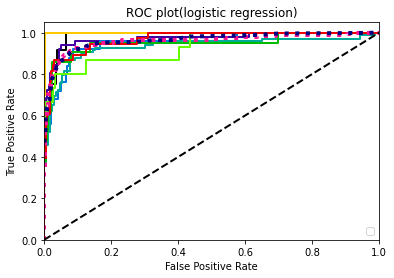

In [129]:
# ROC curve

y_probas = model_logg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_probas,title="ROC plot(logistic regression)")
plt.legend('')
plt.show()

# With PCA 80%

In [136]:
#preprocess the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(0.80)  # 80% del número de componentes son incluidos 
pca.fit(X_train)
train_img80 = pca.transform(X_train)
test_img80 = pca.transform(X_test)

In [137]:
# Fit model
#Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV
param = {'C': [1e1,1e2,1e3,1e4,1e5], 'max_iter':[50,100,500,1000]}
#param = {'C': [1e1], 'max_iter':[100]}
clf = GridSearchCV(LogisticRegression(fit_intercept=False,multi_class='ovr'),param, cv=5)
model_logg = clf.fit(train_img80,y_train)
print(model_logg.best_estimator_)

LogisticRegression(C=10.0, fit_intercept=False, max_iter=50, multi_class='ovr')


In [138]:
print("tuned hpyerparameters :(best parameters) ",model_logg.best_params_)
print("accuracy :",model_logg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'max_iter': 50}
accuracy : 0.7217226528854435


In [139]:
# print("logistic regression")
ypred = model_logg.predict(test_img80)
print(classification_report(y_test,ypred,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.33      0.40        12
     Colin Powell       0.76      0.88      0.82        51
  Donald Rumsfeld       0.70      0.76      0.73        25
    George W Bush       0.85      0.74      0.79        98
Gerhard Schroeder       0.57      0.62      0.59        21
      Hugo Chavez       0.31      0.27      0.29        15
Junichiro Koizumi       1.00      1.00      1.00        10
       Tony Blair       0.70      0.82      0.76        38

         accuracy                           0.74       270
        macro avg       0.67      0.68      0.67       270
     weighted avg       0.74      0.74      0.73       270



# With PCA 90%

In [144]:
#preprocess the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(0.90)  # 90% del número de componentes son incluidos 
pca.fit(X_train)
train_img90 = pca.transform(X_train)
test_img90 = pca.transform(X_test)

In [145]:
# Fit model
#Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV
param = {'C': [1e1,1e2,1e3,1e4,1e5], 'max_iter':[50,100,500,1000]}
#param = {'C': [1e1], 'max_iter':[100]}
clf = GridSearchCV(LogisticRegression(fit_intercept=False,multi_class='ovr'),param, cv=5)
model_logg = clf.fit(train_img90,y_train)
print(model_logg.best_estimator_)

LogisticRegression(C=10.0, fit_intercept=False, max_iter=50, multi_class='ovr')


In [146]:
print("tuned hpyerparameters :(best parameters) ",model_logg.best_params_)
print("accuracy :",model_logg.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'max_iter': 50}
accuracy : 0.790340223944875


In [147]:
# print("logistic regression")
ypred = model_logg.predict(test_img90)
print(classification_report(y_test,ypred,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.89      0.67      0.76        12
     Colin Powell       0.82      0.88      0.85        51
  Donald Rumsfeld       0.70      0.76      0.73        25
    George W Bush       0.90      0.80      0.84        98
Gerhard Schroeder       0.68      0.71      0.70        21
      Hugo Chavez       0.85      0.73      0.79        15
Junichiro Koizumi       0.69      0.90      0.78        10
       Tony Blair       0.73      0.84      0.78        38

         accuracy                           0.80       270
        macro avg       0.78      0.79      0.78       270
     weighted avg       0.81      0.80      0.80       270



### BIBLIOGRAFÍA

https://www.kaggle.com/joparga3/2-tuning-parameters-for-logistic-regression

https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python

https://github.com/harshitrai17152/Labeled-Faces-in-the-Wild.git
    